# Julia for Data Analysis

## Bogumił Kamiński

# Lecture 8. First steps with data frames

## Fetching, unpacking, and inspecting the Lichess data

In [1]:
import Downloads
if isfile("new_puzzles.csv.bz2")
    @info "file already present"
else
    @info "fetching file"
    Downloads.download("https://database.lichess.org/lichess_db_puzzle.csv.bz2",
    "new_puzzles.csv.bz2")
end

┌ Info: file already present
└ @ Main In[1]:3


In [2]:
using CodecBzip2
compressed = read("../puzzles.csv.bz2")

94032447-element Vector{UInt8}:
 0x42
 0x5a
 0x68
 0x39
 0x31
 0x41
 0x59
 0x26
 0x53
 0x59
 0xc1
 0x9d
 0x36
    ⋮
 0xff
 0xb1
 0x77
 0x24
 0x53
 0x85
 0x09
 0x07
 0xf1
 0x49
 0x5f
 0x30

In [3]:
plain = transcode(Bzip2Decompressor, compressed)

366020640-element Vector{UInt8}:
 0x30
 0x30
 0x30
 0x30
 0x38
 0x2c
 0x72
 0x36
 0x6b
 0x2f
 0x70
 0x70
 0x32
    ⋮
 0x34
 0x66
 0x2f
 0x62
 0x6c
 0x61
 0x63
 0x6b
 0x23
 0x32
 0x30
 0x0a

In [4]:
length(plain) / length(compressed)

3.892492981704496

In [5]:
open("puzzles.csv", "w") do io
    println(io, "PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl") #A
    write(io, plain)
end

366020640

In [6]:
readlines("puzzles.csv")

2132990-element Vector{String}:
 "PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl"
 "00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N" ⋯ 118 bytes ⋯ "/lichess.org/787zsVup/black#48"
 "0000D,5rk1/1p3ppp/pq3b2/8/8/1P1" ⋯ 88 bytes ⋯ "https://lichess.org/F8M8OS71#53"
 "0009B,r2qr1k1/b1p2ppp/pp4n1/P1P" ⋯ 113 bytes ⋯ "/lichess.org/4MWQCxQ6/black#32"
 "000aY,r4rk1/pp3ppp/2n1b3/q1pp2B" ⋯ 108 bytes ⋯ "ttps://lichess.org/iihZGl6t#29"
 "000hf,r1bqk2r/pp1nbNp1/2p1p2p/8" ⋯ 111 bytes ⋯ "/lichess.org/71ygsFeE/black#38"
 "000rO,3R4/8/K7/pB2b3/1p6/1P2k3/" ⋯ 80 bytes ⋯ "ttps://lichess.org/tzeeBEc2#115"
 "000tp,4r3/5pk1/1p3np1/3p3p/2qQ4" ⋯ 99 bytes ⋯ "https://lichess.org/GeXqsW90#67"
 "00143,r2q1rk1/5ppp/1np5/p1b5/2p" ⋯ 104 bytes ⋯ "/lichess.org/jcuxlI63/black#34"
 "0018S,2kr3r/pp3p2/4p2p/1N1p2p1/" ⋯ 104 bytes ⋯ "/lichess.org/H1ARO2GL/black#40"
 "001Wz,4r1k1/5ppp/r1p5/p1n1RP2/8" ⋯ 112 bytes ⋯ "/lichess.org/84RH3LaP/black#42"
 "001gi,r6r/1pNk1ppp/2np4/b3p3/4P" ⋯ 115 bytes ⋯ "ttps://lichess.org/

## Loading the CSV data to a data frame

In [7]:
using CSV
using DataFrames
puzzles = CSV.read("puzzles.csv", DataFrame)

,PuzzleId,FEN
,String7,String
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - - 2 27
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP1P/RN1QR1K1 b - - 1 16
4,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/2KR3R w - - 0 15
5,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3R1RK1 b kq - 0 19
6,000rO,3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58
7,000tp,4r3/5pk1/1p3np1/3p3p/2qQ4/P4N1P/1P3RP1/7K w - - 6 34
8,00143,r2q1rk1/5ppp/1np5/p1b5/2p1B3/P7/1P3PPP/R1BQ1RK1 b - - 1 17
9,0018S,2kr3r/pp3p2/4p2p/1N1p2p1/3Q4/1P1P4/2q2PPP/5RK1 b - - 1 20


In [8]:
puzzles2 = CSV.read(plain, DataFrame;
                    header=["PuzzleId", "FEN", "Moves", "Rating", "RatingDeviation",
                            "Popularity", "NbPlays", "Themes", "GameUrl"])

,PuzzleId,FEN
,String7,String
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - - 2 27
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP1P/RN1QR1K1 b - - 1 16
4,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/2KR3R w - - 0 15
5,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3R1RK1 b kq - 0 19
6,000rO,3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58
7,000tp,4r3/5pk1/1p3np1/3p3p/2qQ4/P4N1P/1P3RP1/7K w - - 6 34
8,00143,r2q1rk1/5ppp/1np5/p1b5/2p1B3/P7/1P3PPP/R1BQ1RK1 b - - 1 17
9,0018S,2kr3r/pp3p2/4p2p/1N1p2p1/3Q4/1P1P4/2q2PPP/5RK1 b - - 1 20


In [9]:
puzzles == puzzles2

true

## Freeing memory allocated by large objects

In [10]:
compressed = nothing
plain = nothing

## Inspecting contents of a data frame

In [11]:
puzzles

,PuzzleId,FEN
,String7,String
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - - 2 27
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP1P/RN1QR1K1 b - - 1 16
4,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/2KR3R w - - 0 15
5,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3R1RK1 b kq - 0 19
6,000rO,3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58
7,000tp,4r3/5pk1/1p3np1/3p3p/2qQ4/P4N1P/1P3RP1/7K w - - 6 34
8,00143,r2q1rk1/5ppp/1np5/p1b5/2p1B3/P7/1P3PPP/R1BQ1RK1 b - - 1 17
9,0018S,2kr3r/pp3p2/4p2p/1N1p2p1/3Q4/1P1P4/2q2PPP/5RK1 b - - 1 20


In [12]:
show(describe(puzzles); truncate=14)

9×7 DataFrame
 Row │ variable         mean     min              median  max              nmi ⋯
     │ Symbol           Union…   Any              Union…  Any              Int ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ PuzzleId                  00008                    zzzhI                ⋯
   2 │ FEN                       1B1K4/2P5/4k3/…          rrqb2k1/3n2p1/…
   3 │ Moves                     a1a2 a3a2 b2a2…          h8h7 h6h7 g7h7…
   4 │ Rating           1533.54  511              1498.0  3001
   5 │ RatingDeviation  94.9239  49               78.0    500                  ⋯
   6 │ Popularity       81.7095  -100             89.0    123
   7 │ NbPlays          891.27   0                246.0   309831
   8 │ Themes                    advancedPawn a…          opening
   9 │ GameUrl                   https://liches…          https://liches…      ⋯
                                                               2 columns omitted

In [13]:
ncol(puzzles)

9

In [14]:
nrow(puzzles)

2132989

In [15]:
names(puzzles)

9-element Vector{String}:
 "PuzzleId"
 "FEN"
 "Moves"
 "Rating"
 "RatingDeviation"
 "Popularity"
 "NbPlays"
 "Themes"
 "GameUrl"

## Saving a data frame to CSV file

In [16]:
CSV.write("puzzles2.csv", puzzles)

"puzzles2.csv"

In [17]:
read("puzzles2.csv")

366020716-element Vector{UInt8}:
 0x50
 0x75
 0x7a
 0x7a
 0x6c
 0x65
 0x49
 0x64
 0x2c
 0x46
 0x45
 0x4e
 0x2c
    ⋮
 0x34
 0x66
 0x2f
 0x62
 0x6c
 0x61
 0x63
 0x6b
 0x23
 0x32
 0x30
 0x0a

In [18]:
read("puzzles2.csv") == read("puzzles.csv")

true

## Getting a column out of a data frame

### Property access

In [19]:
puzzles.Rating

2132989-element Vector{Int64}:
 1765
 1525
 1102
 1320
 1560
 1039
 2038
 1822
 2499
 1128
 1135
  991
 2148
    ⋮
 1611
 1401
 1547
 1965
 1641
 1907
 2069
  830
 1828
  980
 1783
 2481

In [20]:
using BenchmarkTools
@btime $puzzles.Rating;

  8.008 ns (0 allocations: 0 bytes)


In [21]:
puzzles.Rating == copy(puzzles.Rating)

true

In [22]:
puzzles.Rating === copy(puzzles.Rating)

false

In [23]:
puzzles.Rating === puzzles.Rating

true

In [24]:
copy(puzzles.Rating) === copy(puzzles.Rating)

false

In [25]:
puzzles."Rating"

2132989-element Vector{Int64}:
 1765
 1525
 1102
 1320
 1560
 1039
 2038
 1822
 2499
 1128
 1135
  991
 2148
    ⋮
 1611
 1401
 1547
 1965
 1641
 1907
 2069
  830
 1828
  980
 1783
 2481

### Indexing

In [26]:
col = "Rating"

"Rating"

In [27]:
puzzles[:, "Rating"]

2132989-element Vector{Int64}:
 1765
 1525
 1102
 1320
 1560
 1039
 2038
 1822
 2499
 1128
 1135
  991
 2148
    ⋮
 1611
 1401
 1547
 1965
 1641
 1907
 2069
  830
 1828
  980
 1783
 2481

In [28]:
puzzles[:, :Rating]

2132989-element Vector{Int64}:
 1765
 1525
 1102
 1320
 1560
 1039
 2038
 1822
 2499
 1128
 1135
  991
 2148
    ⋮
 1611
 1401
 1547
 1965
 1641
 1907
 2069
  830
 1828
  980
 1783
 2481

In [29]:
 puzzles[:, 4]

2132989-element Vector{Int64}:
 1765
 1525
 1102
 1320
 1560
 1039
 2038
 1822
 2499
 1128
 1135
  991
 2148
    ⋮
 1611
 1401
 1547
 1965
 1641
 1907
 2069
  830
 1828
  980
 1783
 2481

In [30]:
puzzles[:, col]

2132989-element Vector{Int64}:
 1765
 1525
 1102
 1320
 1560
 1039
 2038
 1822
 2499
 1128
 1135
  991
 2148
    ⋮
 1611
 1401
 1547
 1965
 1641
 1907
 2069
  830
 1828
  980
 1783
 2481

### Checking for column existence

In [31]:
columnindex(puzzles, "Rating")

4

In [32]:
columnindex(puzzles, "Some fancy column name")

0

In [33]:
hasproperty(puzzles, "Rating")

true

In [34]:
hasproperty(puzzles, "Some fancy column name")

false

### No-copy column indexing

In [35]:
@btime $puzzles[:, :Rating];

  2.443 ms (2 allocations: 16.27 MiB)


In [36]:
puzzles[!, "Rating"]

2132989-element Vector{Int64}:
 1765
 1525
 1102
 1320
 1560
 1039
 2038
 1822
 2499
 1128
 1135
  991
 2148
    ⋮
 1611
 1401
 1547
 1965
 1641
 1907
 2069
  830
 1828
  980
 1783
 2481

In [37]:
puzzles[!, :Rating]

2132989-element Vector{Int64}:
 1765
 1525
 1102
 1320
 1560
 1039
 2038
 1822
 2499
 1128
 1135
  991
 2148
    ⋮
 1611
 1401
 1547
 1965
 1641
 1907
 2069
  830
 1828
  980
 1783
 2481

In [38]:
puzzles[!, 4]

2132989-element Vector{Int64}:
 1765
 1525
 1102
 1320
 1560
 1039
 2038
 1822
 2499
 1128
 1135
  991
 2148
    ⋮
 1611
 1401
 1547
 1965
 1641
 1907
 2069
  830
 1828
  980
 1783
 2481

In [39]:
puzzles[!, col]

2132989-element Vector{Int64}:
 1765
 1525
 1102
 1320
 1560
 1039
 2038
 1822
 2499
 1128
 1135
  991
 2148
    ⋮
 1611
 1401
 1547
 1965
 1641
 1907
 2069
  830
 1828
  980
 1783
 2481

## Visualizing data stored in columns of a data frame

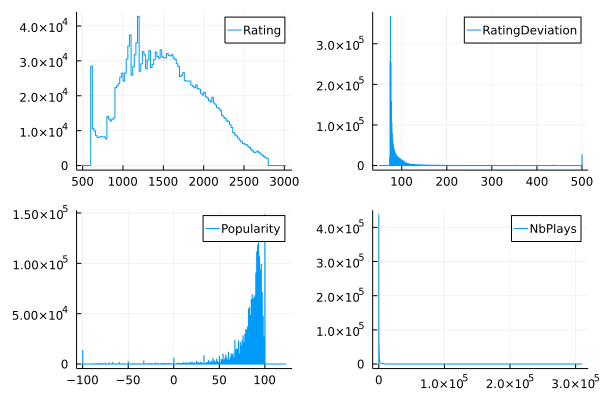

In [40]:
using Plots
plot(histogram(puzzles.Rating; label="Rating"),
histogram(puzzles.RatingDeviation; label="RatingDeviation"),
histogram(puzzles.Popularity; label="Popularity"),
histogram(puzzles.NbPlays; label="NbPlays"))

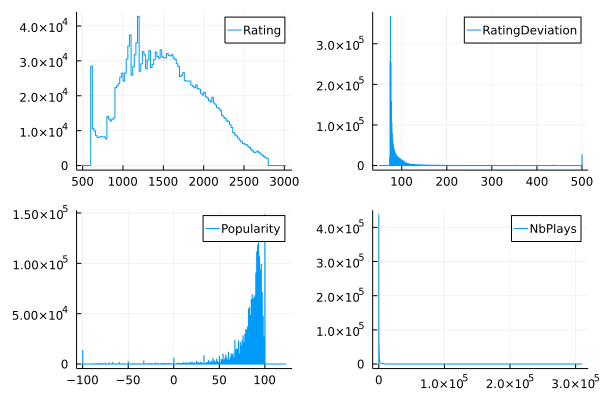

In [41]:
plot([histogram(puzzles[!, col]; label=col) for
      col in ["Rating", "RatingDeviation", "Popularity", "NbPlays"]]...)

## Reading and writing data frames using different formats

### Apache Arrow

In [42]:
using Arrow
Arrow.write("puzzles.arrow", puzzles)

"puzzles.arrow"

In [43]:
arrow_table = Arrow.Table("puzzles.arrow")

Arrow.Table with 2132989 rows, 9 columns, and schema:
 :PuzzleId         String
 :FEN              String
 :Moves            String
 :Rating           Int64
 :RatingDeviation  Int64
 :Popularity       Int64
 :NbPlays          Int64
 :Themes           String
 :GameUrl          String

In [44]:
puzzles_arrow = DataFrame(arrow_table)
puzzles_arrow == puzzles

true

In [45]:
puzzles_arrow.PuzzleId

2132989-element Arrow.List{String, Int32, Vector{UInt8}}:
 "00008"
 "0000D"
 "0009B"
 "000aY"
 "000hf"
 "000rO"
 "000tp"
 "00143"
 "0018S"
 "001Wz"
 "001gi"
 "001om"
 "001u3"
 ⋮
 "zzyfI"
 "zzymN"
 "zzywe"
 "zzzAA"
 "zzzKH"
 "zzzLK"
 "zzzOI"
 "zzzRN"
 "zzzTs"
 "zzzUZ"
 "zzzco"
 "zzzhI"

In [46]:
puzzles_arrow.PuzzleId[1] = "newID"

LoadError: setindex! not defined for Arrow.List{String, Int32, Vector{UInt8}}

In [47]:
puzzles_arrow = copy(puzzles_arrow);
puzzles_arrow.PuzzleId

2132989-element Vector{String}:
 "00008"
 "0000D"
 "0009B"
 "000aY"
 "000hf"
 "000rO"
 "000tp"
 "00143"
 "0018S"
 "001Wz"
 "001gi"
 "001om"
 "001u3"
 ⋮
 "zzyfI"
 "zzymN"
 "zzywe"
 "zzzAA"
 "zzzKH"
 "zzzLK"
 "zzzOI"
 "zzzRN"
 "zzzTs"
 "zzzUZ"
 "zzzco"
 "zzzhI"

### SQLite

In [48]:
using SQLite
db = SQLite.DB("puzzles.db")

SQLite.DB("puzzles.db")

In [49]:
SQLite.load!(puzzles, db, "puzzles")

"puzzles"

In [50]:
 SQLite.tables(db)

1-element Vector{SQLite.DBTable}:
 SQLite.DBTable("puzzles", Tables.Schema:
 :PuzzleId         Union{Missing, String}
 :FEN              Union{Missing, String}
 :Moves            Union{Missing, String}
 :Rating           Union{Missing, Int64}
 :RatingDeviation  Union{Missing, Int64}
 :Popularity       Union{Missing, Int64}
 :NbPlays          Union{Missing, Int64}
 :Themes           Union{Missing, String}
 :GameUrl          Union{Missing, String})

In [51]:
SQLite.columns(db, "puzzles")

(cid = [0, 1, 2, 3, 4, 5, 6, 7, 8], name = ["PuzzleId", "FEN", "Moves", "Rating", "RatingDeviation", "Popularity", "NbPlays", "Themes", "GameUrl"], type = ["TEXT", "TEXT", "TEXT", "INT", "INT", "INT", "INT", "TEXT", "TEXT"], notnull = [1, 1, 1, 1, 1, 1, 1, 1, 1], dflt_value = [missing, missing, missing, missing, missing, missing, missing, missing, missing], pk = [0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
query = DBInterface.execute(db, "SELECT * FROM puzzles")

SQLite.Query(SQLite.Stmt(SQLite.DB("puzzles.db"), 5), Base.RefValue{Int32}(100), [:PuzzleId, :FEN, :Moves, :Rating, :RatingDeviation, :Popularity, :NbPlays, :Themes, :GameUrl], Type[Union{Missing, String}, Union{Missing, String}, Union{Missing, String}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, String}, Union{Missing, String}], Dict(:NbPlays => 7, :Themes => 8, :GameUrl => 9, :Moves => 3, :RatingDeviation => 5, :FEN => 2, :Rating => 4, :PuzzleId => 1, :Popularity => 6), Base.RefValue{Int64}(0))

In [53]:
puzzles_db = DataFrame(query)

,PuzzleId,FEN
,String,String
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - - 2 27
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP1P/RN1QR1K1 b - - 1 16
4,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/2KR3R w - - 0 15
5,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3R1RK1 b kq - 0 19
6,000rO,3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58
7,000tp,4r3/5pk1/1p3np1/3p3p/2qQ4/P4N1P/1P3RP1/7K w - - 6 34
8,00143,r2q1rk1/5ppp/1np5/p1b5/2p1B3/P7/1P3PPP/R1BQ1RK1 b - - 1 17
9,0018S,2kr3r/pp3p2/4p2p/1N1p2p1/3Q4/1P1P4/2q2PPP/5RK1 b - - 1 20


In [54]:
puzzles_db == puzzles

false

In [55]:
puzzles_db.PuzzleId

4265978-element Vector{String}:
 "00008"
 "0000D"
 "0009B"
 "000aY"
 "000hf"
 "000rO"
 "000tp"
 "00143"
 "0018S"
 "001Wz"
 "001gi"
 "001om"
 "001u3"
 ⋮
 "zzyfI"
 "zzymN"
 "zzywe"
 "zzzAA"
 "zzzKH"
 "zzzLK"
 "zzzOI"
 "zzzRN"
 "zzzTs"
 "zzzUZ"
 "zzzco"
 "zzzhI"

In [56]:
close(db)